<a href="https://colab.research.google.com/github/Hanno-stud/task4-day4-Elevate-Labs/blob/main/Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Breast_Cancer_Wisconsin_(Diagnostic)_dataset.csv to Breast_Cancer_Wisconsin_(Diagnostic)_dataset (1).csv


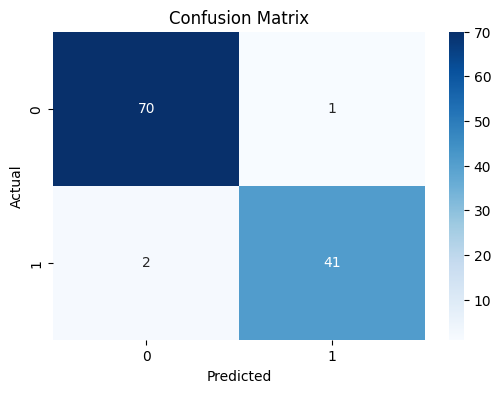


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC-AUC Score: 0.9974


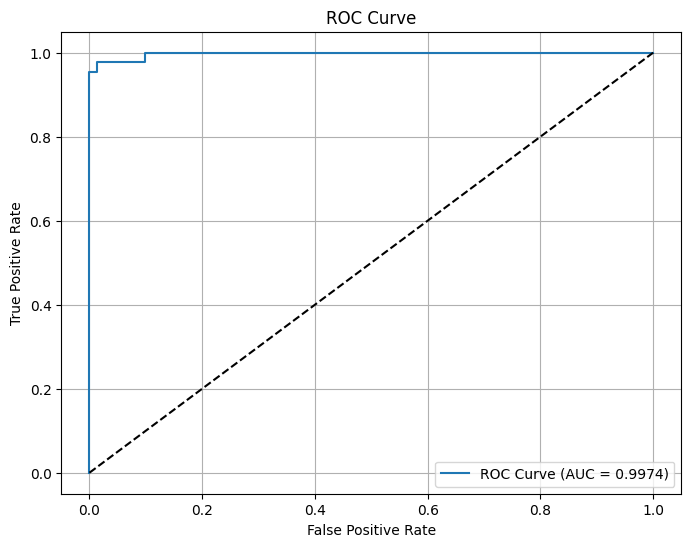


Confusion Matrix at Threshold 0.3:
 [[67  4]
 [ 1 42]]

Sigmoid Function Example:


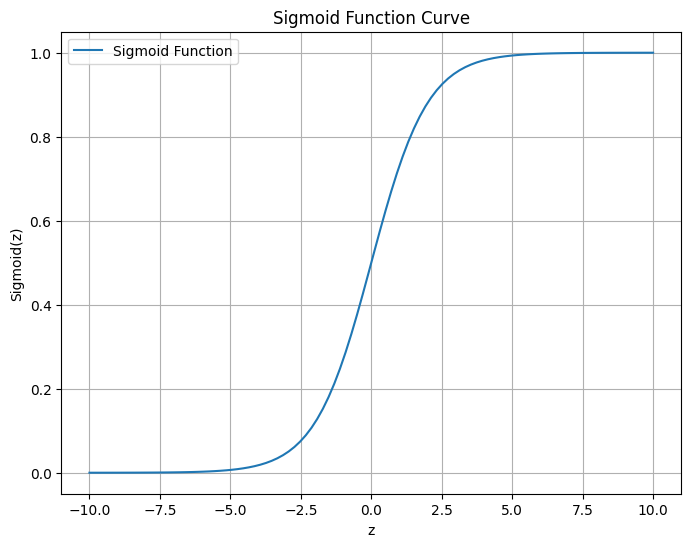

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset

# 📤 Upload the cleaned Titanic dataset
from google.colab import files
uploaded = files.upload()

# Load Dataset

breast_cancer_wisconsin = pd.read_csv('Breast_Cancer_Wisconsin_(Diagnostic)_dataset.csv')
data = breast_cancer_wisconsin.copy()


# Drop ID and Unnamed column
data = data.drop(['id', 'Unnamed: 32'], axis=1)

# Encode target variable: Malignant = 1, Benign = 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Step 2: Split and Standardize
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluation
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision, Recall, ROC-AUC
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Step 5: Threshold Tuning
threshold = 0.3  # Example threshold
y_pred_threshold = (y_proba >= threshold).astype(int)
print(f"\nConfusion Matrix at Threshold {threshold}:\n", confusion_matrix(y_test, y_pred_threshold))

# Sigmoid Function Explanation
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

print("\nSigmoid Function Example:")
z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

plt.figure(figsize=(8, 6))
plt.plot(z, sigmoid_values, label='Sigmoid Function')
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.title('Sigmoid Function Curve')
plt.grid()
plt.legend()
plt.show()
